## This notebook explains how to compare the performance of models used in supervised tasks to determine which model is a better fit for the project.

##### Note: This is a continuation from lesson "1-KNN_NearestNeighbor"

### This lesson will answer the following questions:
#### How to choose which model to use for the supervised learning task?
#### How to choose the nest tuning parameters for that model?
#### How to estimate the likely performance of the model for out-of-sample date?

### Two widely known procedures are used for these purposes

### Evaluation procedure 1: Train and test on the entire dataset
#### Step 1: Import mode, train the model on the entire dataset.
#### Step 2: Test the model on the same dataset, and evaluate how well it predicted by comparing the predicted response values with the true response values. This will calculate the Classification Accuracy by calculating the proportion of correct predictions. This is a common evaliation metric for classification problems/tasks.

##### Note: When you train and test the model on the same data, it is knwn as training accuracy.

### Evaluation procedure 2: Train/test split
#### Step 1: Split the dataset into two pieces: a training set and a testing set
#### Step 2: Train the model using the training set
#### Step 3: Test the model using the testing set, and evaluate how well it predicted by comparing to know results form training set



## Using Evaluation Procedure 1

In [11]:
#Step 1 - Logistic Regression - import reuqired libraries and load dataset
import pandas as pd
import numpy as np

#import iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

#store feature matrix in "X" - here 'X' is in uppercase to denote that it represents a matrix (in this case a 150x4
#matrix since it contains 4 features (i.e. columns/attributes) and 150 observations (i.e. rows/records))
X = iris.data

#store respone/target vector in 'y' - here 'y' is in lowercase to denote that it represent a vector (i.e. a 
#1-Dimensional series)
y = iris.target

#verify shape of X and y
print(X.shape)
print(y.shape)

#instantiate model and fit/train
from sklearn.linear_model import LogisticRegression

#instantiate model
logreg = LogisticRegression()

#train/fit model
logreg.fit(X,y)

#predict on whole features dataset/matrix 'X' and store prediction in variable
y_pred = logreg.predict(X)

(150, 4)
(150,)


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
#Step 2 - Logistic Regression - calculate classification accuracy

#import metrics
from sklearn import metrics

#calculate classifcation accuracy
print(metrics.accuracy_score(y,y_pred))

0.9733333333333334


In [13]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
#Step 1 - KNN classifier model - import reuqired libraries and load dataset
from sklearn.neighbors import KNeighborsClassifier

##instantiate model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

#train/fit model
knn.fit(X,y)

#predict on whole features dataset/matrix 'X' and store prediction in variable
y_pred = knn.predict(X)

In [15]:
#Step 2 - KNN classifier model - calculate classification accuracy

#calculate classifcation accuracy
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


In [16]:
#Try KNN again with k=1

##instantiate model with k=1
knn = KNeighborsClassifier(n_neighbors=1)

#train/fit model
knn.fit(X,y)

#predict on whole features dataset/matrix 'X' and store prediction in variable
y_pred = knn.predict(X)

#calculate classifcation accuracy
print(metrics.accuracy_score(y,y_pred))

1.0


### Warning: The above result is misleading since it is implying that the KNN model with k=1 is the most accurate model. However, since we are testing on the sample-data, classification accuracy will always equal 1 when using knn with k=1 on the sample data to calculate it. This is the short coming of the first evaluation procedure.

### - The goal of calculating classificatio accuracy is to estimate performance of *Out-of-sample* data (not sample-data
### - But, maximizing the training accuracy results in *overly complex models* that won't necessarily be able to generalize (to predict using out of sample data)
### - This is known as over fitting the training data (the model will learn the noise in the data)

## Using Evaluation Procedure 2

In [17]:
#Step 1: split X and y into training and testing sets

#import sklearns trains_test_split function
from sklearn.model_selection import train_test_split

#split the data - below we chose 40% of dataset will be used to test, 60% to train - splitting is random unless 
# passing in random_state argument
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=4)

#optional - output shape of splits datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [18]:
#Step 2 - Logistic Regression - Train the model using the training set
logreg.fit(X_train,y_train)

LogisticRegression()

In [19]:
#step 3 - Logistic Regression -Test the model using the testing set, and evaluate classificaiton accuracy
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [21]:
#Step 2 - KNN classifier model - Train the model using the training set

##instantiate model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

#train/fit model
knn.fit(X_train,y_train)

#predict on whole features dataset/matrix 'X' and store prediction in variable
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [22]:
##instantiate model with k=1
knn = KNeighborsClassifier(n_neighbors=1)

#train/fit model
knn.fit(X_train,y_train)

#predict on whole features dataset/matrix 'X' and store prediction in variable
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


## We can get optimized value of K by:
### Step 1: trying different values of K in a for loop
### Step 2: plotting score values against corresponding K value to determine k with max accuracy

In [24]:
#Step 1: try k=1 through 25 and record accuracy score
k_range = range(1,25)
Scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    Scores.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

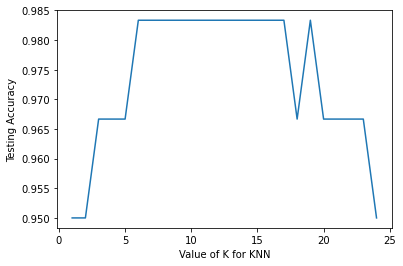

In [25]:
#Step 2 - Plot scores vs k values

#import matplotlib (scientific potting library)
import matplotlib.pyplot as plt

#allow plots to appear within the notebook
%matplotlib inline

#plot the relationship between k and scores
plt.plot(k_range,Scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

###  Once optimal model and hyperparameter values are determined, re-train the chosen model using the WHOLE dataset. Below we'll be retraiing using whole dataset and predict out-of-sample data

In [27]:
#Retrain using k = 11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X,y)
i = np.array([3,5,4,2])
knn.predict(i.reshape(1,-1))

array([1])

## Downside of train/test split:
### - Provides a *high variance estimate* of out-of-sample accuracy (it can change a lot depending on which data happens to be in the training set versus the testing set
### - k-fold cross-validation overcomes this limitation
### - But, tarin/test split is still useful because of its flexibility and speed

## Additional resources:
- www.scottfortmann-roe.com/docs/BiasVariance.html
- Quora Article: What is an intuitive explanation of overfitting?
- YouTube: Estimating prediction error by Hastie and Tibshirani